<a href="https://colab.research.google.com/github/MohammedGamil19/NLP_Analysis-TripAdvisor-Hotel-Reviews-Dataset-/blob/main/machine_learning_(ML)_and_deep_learning_(DL)_approaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shujaa21","key":"0e41f539a307d73be115a75c4dfd858f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### -  Download Dataset from Kaggle




In [3]:
!kaggle datasets download -d everydaycodings/global-news-dataset
!unzip global-news-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/everydaycodings/global-news-dataset
License(s): CC0-1.0
 93% 373M/400M [00:01<00:00, 213MB/s]
100% 400M/400M [00:01<00:00, 247MB/s]
Archive:  global-news-dataset.zip
  inflating: data.csv                
  inflating: rating.csv              
  inflating: raw-data.csv            


In [6]:
import pandas as pd
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
from nltk.corpus import stopwords

# Load data
df = pd.read_csv('data.csv')
df = df.dropna(subset=['content'])  # Drop rows with no text

# Preprocess text
stop_words = set(stopwords.words('english'))
def clean(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    return ' '.join([word for word in text.split() if word not in stop_words])

df['clean'] = df['content'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

df = df[df['clean'].str.split().str.len() > 10]  # filter short texts
df = df.sample(2000, random_state=1)
df['label'] = df.index % 2  # just to enable training demo

X_train, X_test, y_train, y_test = train_test_split(df['clean'], df['label'], test_size=0.2)
vec = TfidfVectorizer()
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)
preds = model.predict(X_test_vec)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.49      0.58      0.53       195
           1       0.51      0.42      0.46       205

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



In [8]:
from sklearn.decomposition import LatentDirichletAllocation

vec = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
X = vec.fit_transform(df['clean'])
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(X)

# Show topics
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vec.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 0:
['15', 'november', 'earnings', 'reports', 'shares', 'stock', 'rating', 'research', 'free', 'report']
Topic 1:
['think', 'going', 'way', 'war', 'city', 'time', 'years', 'said', 'new', 'like']
Topic 2:
['trading', 'company', 'traded', 'new', 'global', 'market', 'globe', 'newswire', 'nov', '2023']
Topic 3:
['getty', 'oct', 'people', 'president', 'european', 'october', 'said', 'year', '2023', 'world']
Topic 4:
['position', 'shares', 'filing', 'company', 'second', 'recent', 'according', 'free', 'report', 'quarter']


In [9]:
!pip install transformers -q

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Test on one sample
sentiment_pipeline("Global economy is recovering and markets are optimistic.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.997960090637207}]

In [16]:
for i in range(3):
    print("Text:", df['clean'].iloc[i])
    print("Prediction:", sentiment_pipeline(df['clean'].iloc[i]))
    print("-" * 60)

Text: jessica simpson marked six years sobriety sharing “unrecognizable” photo taken day decided stop drinking appearing sad pensive “irresistible” singer sits … 3019 chars
Prediction: [{'label': 'POSITIVE', 'score': 0.6052785515785217}]
------------------------------------------------------------
Text: cullen frost bankers inc lowered holdings shares cadence design systems inc nasdaqcdns – free report 128 second quarter according company recent 13f fi… 6589 chars
Prediction: [{'label': 'NEGATIVE', 'score': 0.9840622544288635}]
------------------------------------------------------------
Text: discovery made team headed dr resmi sebastian assistant professor institutes civil engineering department according experts presence tantalum significant n… 3209 chars
Prediction: [{'label': 'POSITIVE', 'score': 0.9924539923667908}]
------------------------------------------------------------


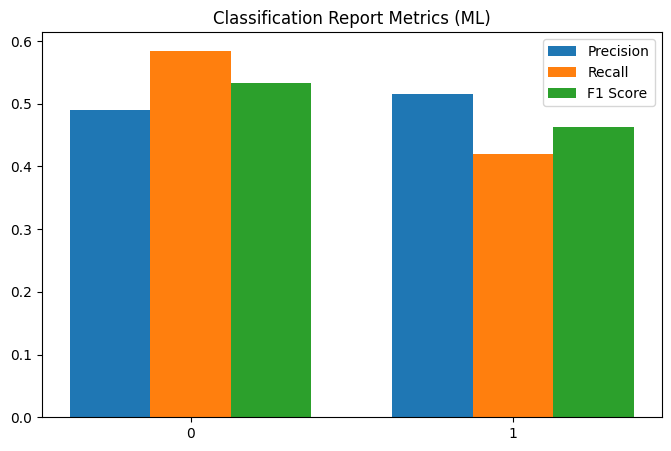

In [13]:
from sklearn.metrics import classification_report
import numpy as np

# Get metrics from classification report
y_pred = model.predict(X_test_vec) # Add this line to make predictions
report = classification_report(y_test, y_pred, output_dict=True)
labels = list(report.keys())[:-3]  # exclude avg/total
accuracy = [report[label]['precision'] for label in labels]
recall = [report[label]['recall'] for label in labels]
f1 = [report[label]['f1-score'] for label in labels]

# Plot
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x - width, accuracy, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')
plt.xticks(x, labels)
plt.title("Classification Report Metrics (ML)")
plt.legend()
plt.show()

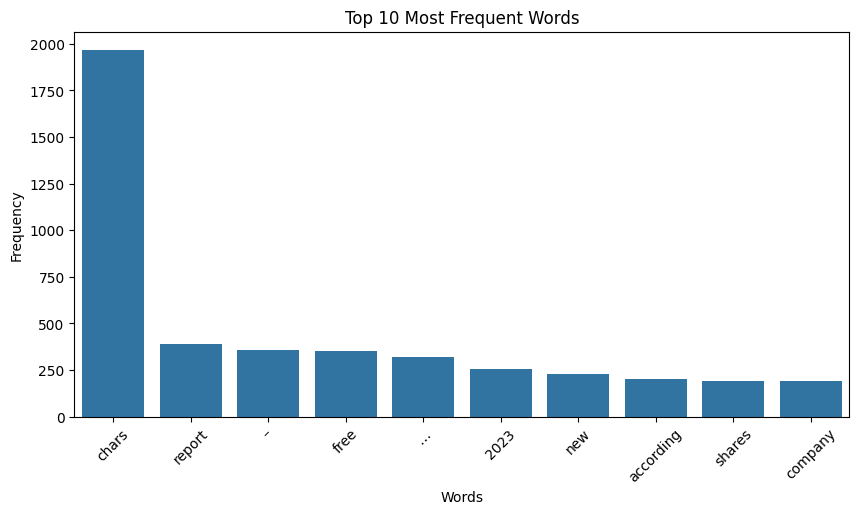

In [14]:
from collections import Counter

# Get most common words
all_words = ' '.join(df['clean']).split()
common_words = Counter(all_words).most_common(10)
words, freqs = zip(*common_words)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs))
plt.title('Top 10 Most Frequent Words')
plt.ylabel('Frequency')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.show()

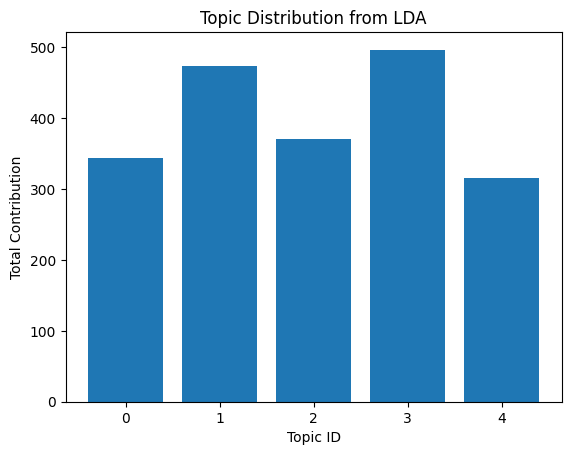

In [15]:
# Visualize topic contribution (optional if you store topic IDs per doc)
topic_distribution = lda.transform(X)
topic_sums = topic_distribution.sum(axis=0)

plt.bar(range(len(topic_sums)), topic_sums)
plt.title("Topic Distribution from LDA")
plt.xlabel("Topic ID")
plt.ylabel("Total Contribution")
plt.show()